   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

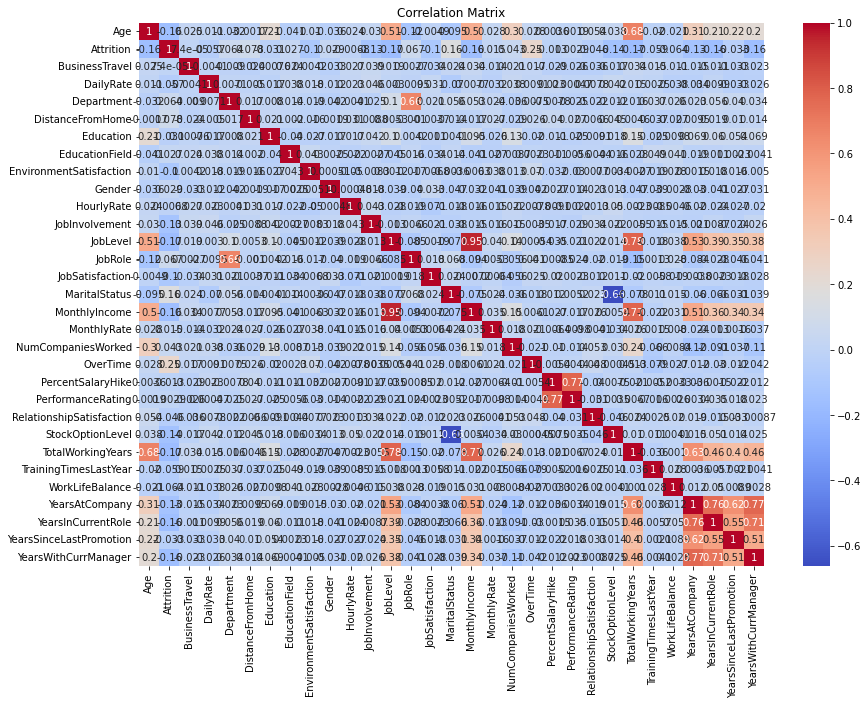

Classification Accuracy: 0.8401360544217688
Confusion Matrix:
 [[241   6]
 [ 41   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294



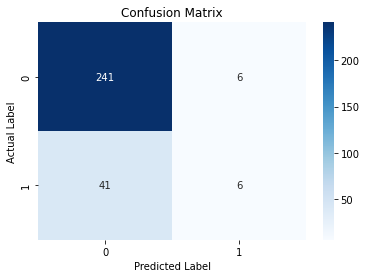

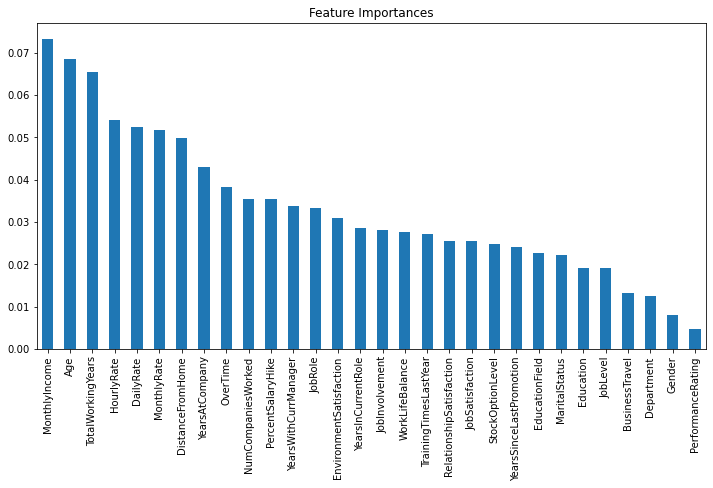

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the dataset
url = "https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/raw/master/ibm-hr-analytics-employee-attrition-performance.zip"
data = pd.read_csv(url)

# Step 3: Explore the data
print(data.head())  # First few rows of the dataset
print(data.info())  # Information about the dataset

# Step 4: Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in the dataset:\n{missing_values}")

# Step 5: Drop unnecessary columns (irrelevant to attrition prediction)
# Columns like 'EmployeeCount', 'Over18', 'StandardHours' are irrelevant
data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

# Step 6: Convert categorical variables to numerical using Label Encoding
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Step 7: Visualize the correlation between variables
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 8: Split the dataset into features (X) and target (y)
X = data.drop(columns=['Attrition'])  # Features
y = data['Attrition']  # Target (Attrition)

# Step 9: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 10: Feature Scaling (Standardize the features for optimal model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 11: Classification Model - Random Forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Step 12: Make predictions on the test set
y_pred = classifier.predict(X_test)

# Step 13: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Classification Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Step 14: Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 15: Feature Importance (to understand which factors contribute to attrition)
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importances")
plt.show()
